Tasks

1. Acquisition of a suitable dataset for working with noisy data (examples)
2. Assess the degree of noise for the time series data(s) in the dataset through data visualization.
3. Apply appropriate preprocessing (moving average, or frequency domain filtering).
4. Plot data before and after preprocessing.

Examples
https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231
https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import signal


In [4]:
path = "stock_data.csv"
df = pd.read_csv(path)
if df is None:
    print("DataFrame is empty")
else:
    print("DataFrame loaded correctly!")

DataFrame loaded correctly!


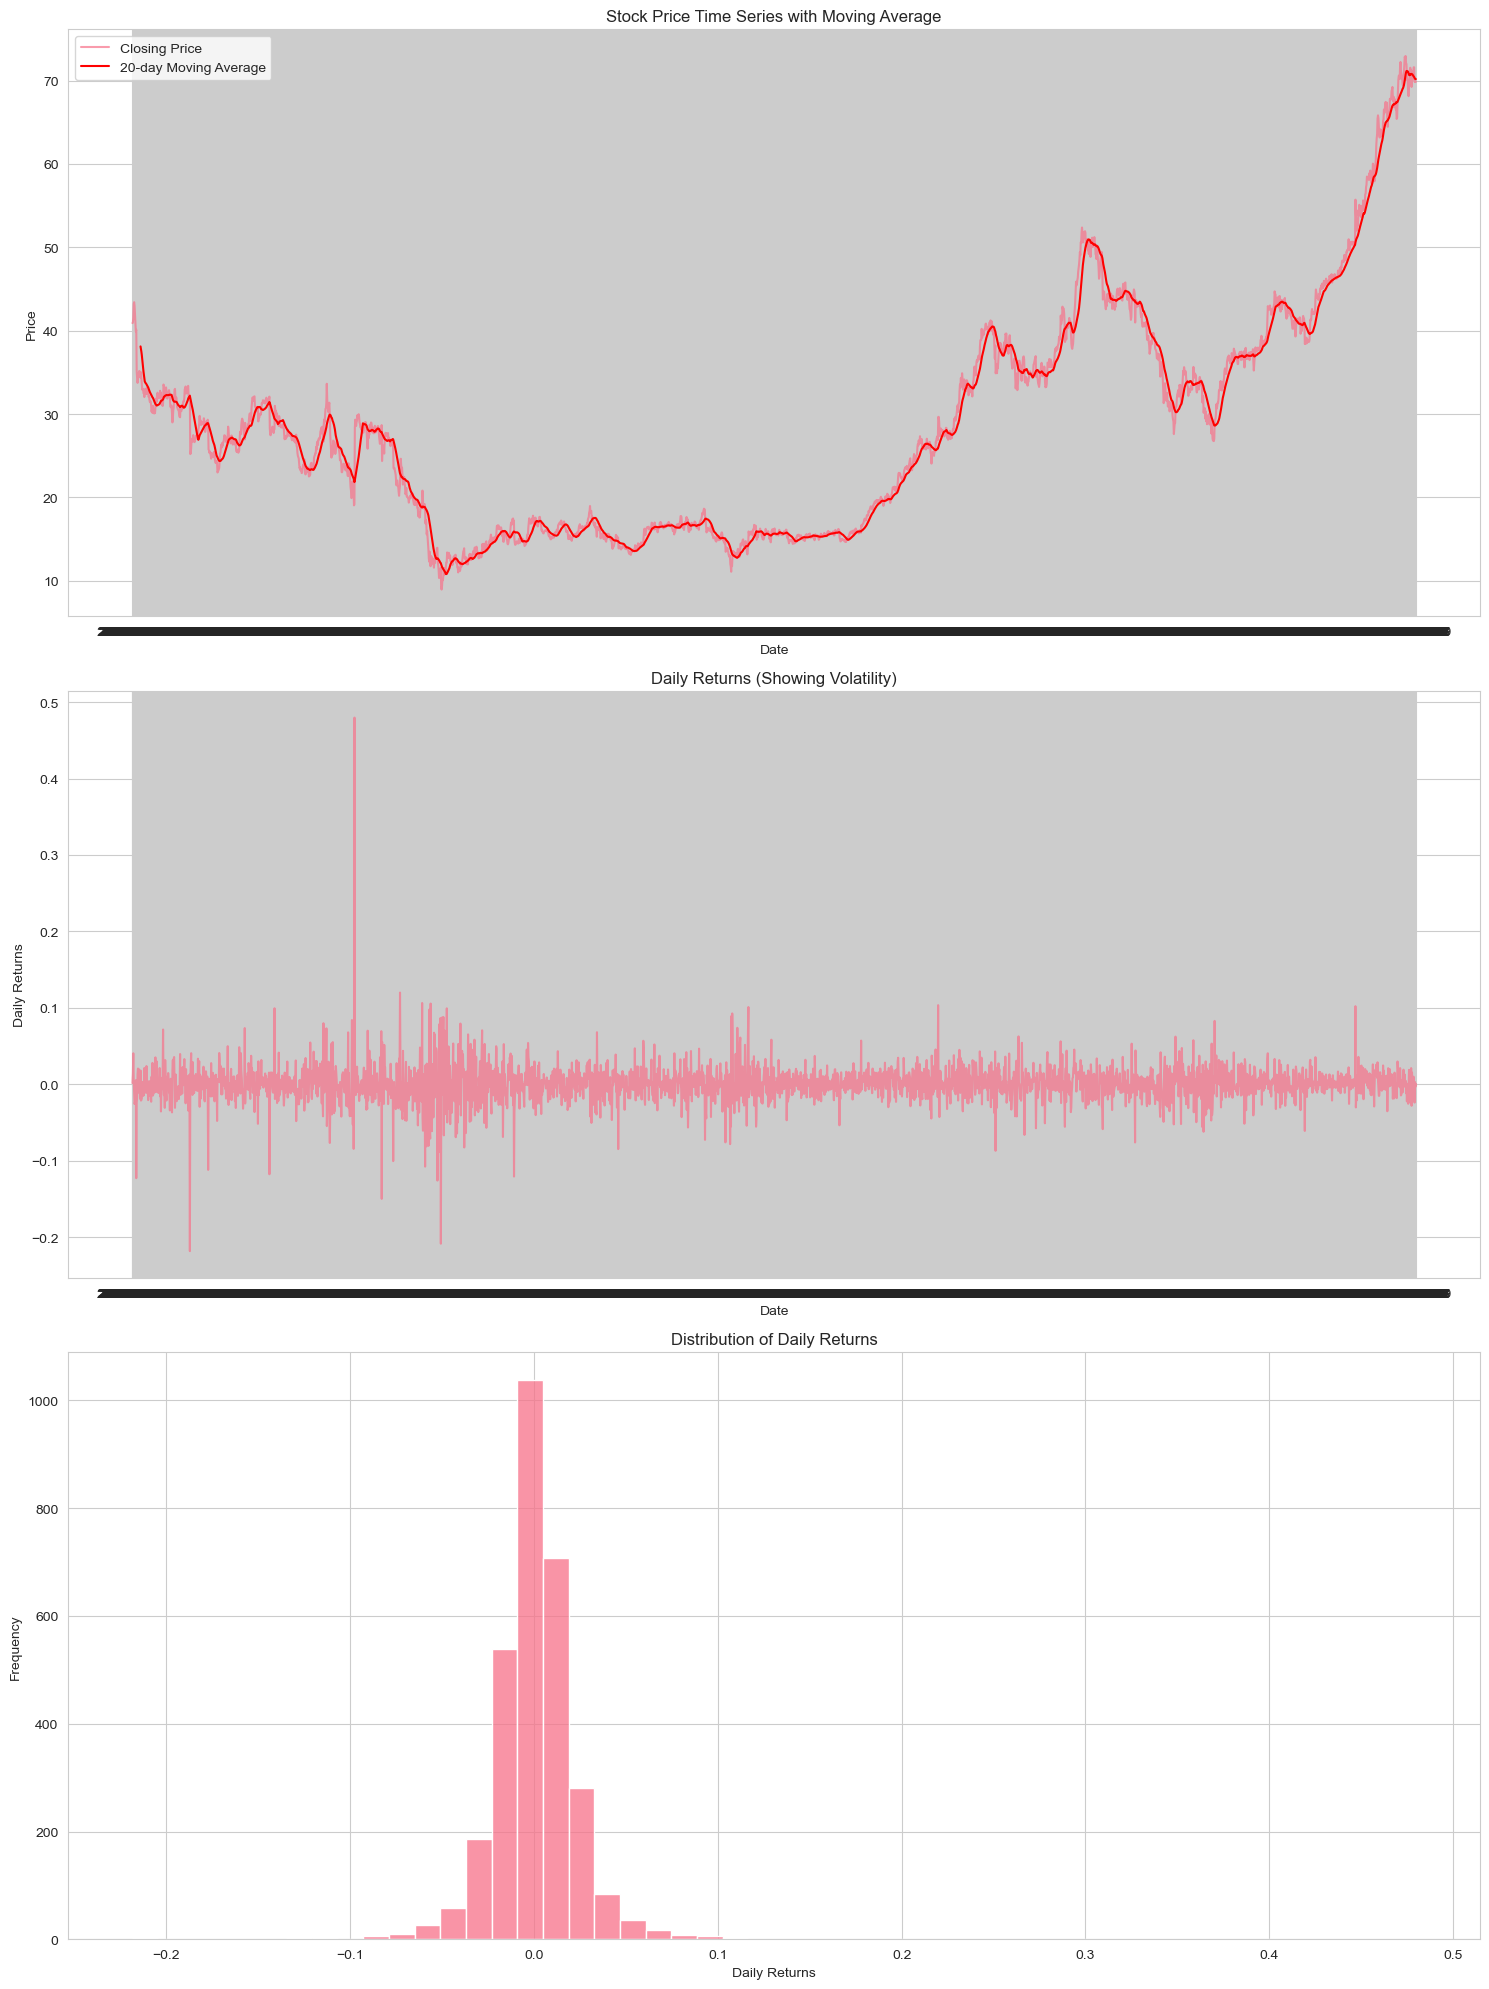


Noise Statistics:
Standard Deviation: 0.024344
Variance: 0.000593
Mean Absolute Deviation: 0.015590


In [5]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))

# Plot 1: Time series with moving average
sns.lineplot(data=df, x='Date', y='Close', label='Closing Price', alpha=0.7, ax=ax1)
sns.lineplot(data=df, x='Date', y=df['Close'].rolling(window=20).mean(), 
            label='20-day Moving Average', color='red', ax=ax1)
ax1.set_title('Stock Price Time Series with Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Plot 2: Daily returns
daily_returns = df['Close'].pct_change()
sns.lineplot(data=df, x='Date', y=daily_returns, alpha=0.7, ax=ax2)
ax2.set_title('Daily Returns (Showing Volatility)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Returns')

# Plot 3: Distribution of returns
sns.histplot(data=daily_returns, bins=50, ax=ax3)
ax3.set_title('Distribution of Daily Returns')
ax3.set_xlabel('Daily Returns')
ax3.set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Calculate and display noise statistics
noise_stats = {
    'Standard Deviation': daily_returns.std(),
    'Variance': daily_returns.var(),
    'Mean Absolute Deviation': np.mean(np.abs(daily_returns - daily_returns.mean()))
}

print("\nNoise Statistics:")
for metric, value in noise_stats.items():
    print(f"{metric}: {value:.6f}")

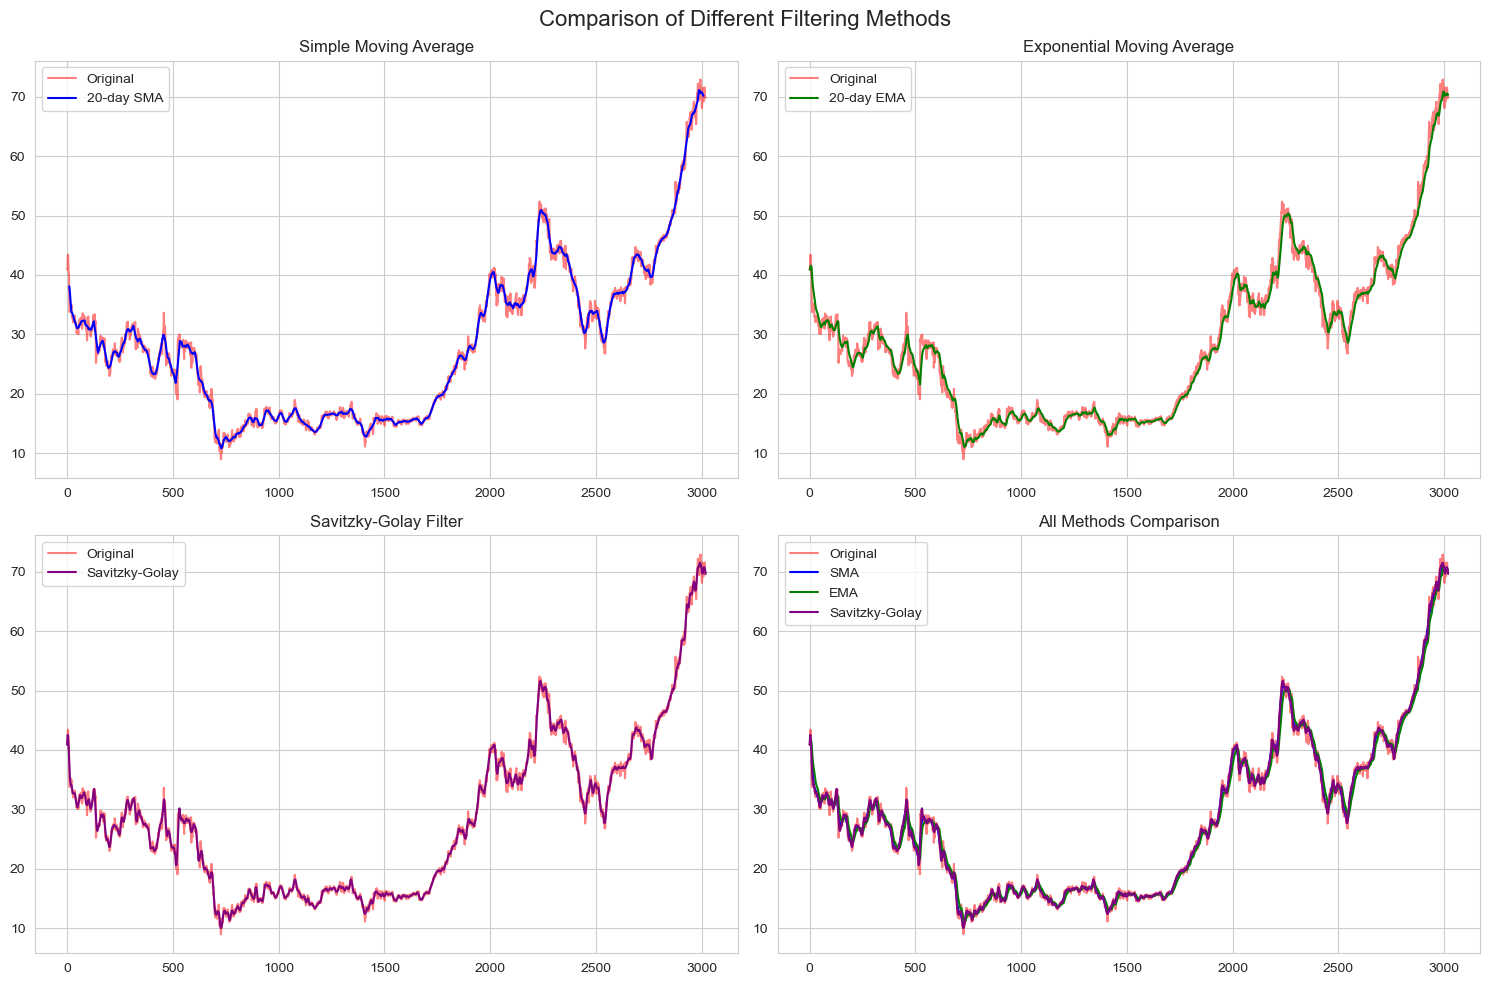

In [15]:
# 1. Simple Moving Average (SMA)
def apply_sma(data, window_size):
    return data.rolling(window=window_size, center=True).mean()

# 2. Exponential Moving Average (EMA)
def apply_ema(data, span):
    return data.ewm(span=span, adjust=False).mean()

# 3. Savitzky-Golay filter (good for preserving features better than moving averages)
def apply_savgol(data, window_length, poly_order):
    return signal.savgol_filter(data, window_length, poly_order)

# Apply the filters to your data
def plot_filtered_results(df, price_column='Close'):
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Comparison of Different Filtering Methods', fontsize=16)
    
    # Original data
    axes[0, 0].plot(df[price_column], 'r', label='Original', alpha=0.5)
    axes[0, 0].plot(apply_sma(df[price_column], 20), 'b', label='20-day SMA')
    axes[0, 0].set_title('Simple Moving Average')
    axes[0, 0].legend()
    
    # EMA
    axes[0, 1].plot(df[price_column], 'r', label='Original', alpha=0.5)
    axes[0, 1].plot(apply_ema(df[price_column], 20), 'g', label='20-day EMA')
    axes[0, 1].set_title('Exponential Moving Average')
    axes[0, 1].legend()
    
    # Savitzky-Golay
    axes[1, 0].plot(df[price_column], 'r', label='Original', alpha=0.5)
    axes[1, 0].plot(apply_savgol(df[price_column], 21, 3), 'purple', label='Savitzky-Golay')
    axes[1, 0].set_title('Savitzky-Golay Filter')
    axes[1, 0].legend()
    
    # Compare all methods
    axes[1, 1].plot(df[price_column], 'r', label='Original', alpha=0.5)
    axes[1, 1].plot(apply_sma(df[price_column], 20), 'b', label='SMA')
    axes[1, 1].plot(apply_ema(df[price_column], 20), 'g', label='EMA')
    axes[1, 1].plot(apply_savgol(df[price_column], 21, 3), 'purple', label='Savitzky-Golay')
    axes[1, 1].set_title('All Methods Comparison')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# Apply the filtering
plot_filtered_results(df)